# Mushroom Classification Utilizing Logistic Regression
Author: Tristan Hillis

In [1]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sys
import itertools

# Setting some plotting parameters
sns.set_context('paper')
sns.set(style='whitegrid', rc={'grid.linestyle':':', 'axes.titlesize':16, 'axes.labelsize':16, 'xtick.labelsize':16,
                              'ytick.labelsize':14, 'figure.figsize':(8,6), 'legend.fontsize':12})

## Import data

In [2]:
# Import the data
data = pd.read_csv("mushrooms.csv")

## Break up data to see interesting things

In [3]:
# Split the data into poisonous and edible just to report on things
poisonous = data[data['class'] == 'p']
edible = data[data['class'] == 'e']

# Print sizes
print("Number of poisonous:", poisonous.shape[0])
print("Number of edible:", edible.shape[0])

# print the ratios
print("Ratio of poisonous: %.3f%%" % (poisonous.shape[0]/data.shape[0]*100))
print("Ratio of edible: %.3f%%" % (edible.shape[0]/data.shape[0]*100))

Number of poisonous: 3916
Number of edible: 4208
Ratio of poisonous: 48.203%
Ratio of edible: 51.797%


## Change string data to numerical data.

In [4]:
# Change labels to numeric values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
print(data['class'][:10])
# Transform each column
for key in data.keys():
    data[key] = le.fit_transform(data[key])

0    p
1    e
2    e
3    p
4    e
5    e
6    e
7    e
8    p
9    e
Name: class, dtype: object


In [5]:
# Check the new labels
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [6]:
# Separate the labels from the features
labels = data.iloc[:, 0]
features = data.iloc[:,1:]

highly_cor = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor']
subset_features = features[highly_cor]

# Scale the data
The logistic model doesn't require that you scale the data, but it is a good habit.

In [7]:
# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = scaler.fit_transform(features)
subset_features = scaler.fit_transform(subset_features)

In [8]:
# Split the data up into training and testing.
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels.values, train_size=0.3)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Validation using Stratified KFold

This uses cross-validation to mitigate overfitting of data when adjusting hyperparameters

Will use $k=10$.

Startified KFold Link: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

Logistic Regression Link:http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

Metrics for classification: http://scikit-learn.org/stable/modules/classes.html#classification-metrics

In [9]:
from sklearn.model_selection import StratifiedKFold

# For model fitting.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

skf = StratifiedKFold(n_splits=10)

Cs = np.arange(0.001, 3, 0.01)
accuracy = np.empty(Cs.size)
roc = np.empty(Cs.size)
recall = np.empty(Cs.size)
precision = np.empty(Cs.size)
errors = np.empty(Cs.size)

for j, C in enumerate(Cs):
    lr = LogisticRegression(C=C)
    curr_accuracy = np.empty(skf.n_splits)
    curr_roc = np.empty(skf.n_splits)
    curr_recall = np.empty(skf.n_splits)
    curr_precision = np.empty(skf.n_splits)
    curr_error = np.empty(skf.n_splits)

    i = 0
    for train_index, test_index in skf.split(features_train, labels_train):

        val_feature_train, val_feature_test = features_train[train_index], features_train[test_index]
        val_label_train, val_label_test = labels_train[train_index], labels_train[test_index]
        
        # Run fitting on training data
        lr.fit(val_feature_train, val_label_train)
        
        # Find probabilities
        val_label_prob = lr.predict_proba(val_feature_test)[:,1]
        
        # Get predicted labels
        val_label_pred = np.where(val_label_prob>0.5, 1, 0)
        
        curr_accuracy[i] = metrics.accuracy_score(val_label_test, val_label_pred)
        curr_roc[i] = metrics.roc_auc_score(val_label_test, val_label_pred)
        curr_recall[i] = metrics.recall_score(val_label_test, val_label_pred)
        curr_precision[i] = metrics.precision_score(val_label_test, val_label_pred)
        curr_error[i] = lr.score(val_feature_test, val_label_test)
        
        i += 1
    accuracy[j] = curr_accuracy.mean()
    roc[j] = curr_roc.mean()
    recall[j] = curr_recall.mean()
    precision[j] = curr_precision.mean()
    errors[j] = curr_error.mean()

print("Done!")

Done!


# Results of parameterization of hyperparameter while utilizing cross-validation

Looking at the plot below we see how the accuracy, ROC, recall, and precision level off at $\sim1$ therefore we will simply keep the default
$C=1.0$.

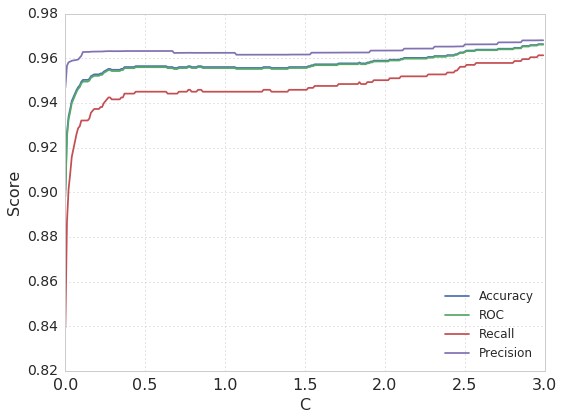

In [10]:
# Plot scores
plt.plot(Cs, accuracy, label='Accuracy')
plt.plot(Cs, roc, label='ROC')
plt.plot(Cs, recall, label='Recall')
plt.plot(Cs, precision, label='Precision')

plt.ylabel("Score")
plt.xlabel("C")
plt.legend(loc=4)
plt.tight_layout()

plt.savefig("tristanCrossVal")

In [11]:
# Pass in the training data
lr = LogisticRegression(C=1.0)
lr.fit(features_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Make predictions

In [12]:
labels_prob = lr.predict_proba(features_test)[:,1]

labels_pred = np.where(labels_prob>0.5, 1, 0)

#lr.score(features_test, labels_pred)

Confusion matrix, without normalization
[[2801  134]
 [ 134 2618]]
Accuracy: 0.95287497802


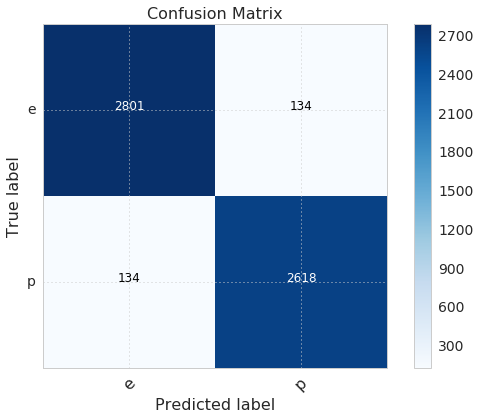

In [13]:
confusion_matrix = metrics.confusion_matrix(labels_test, labels_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.3)

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['e','p'], normalize=False, title='Confusion Matrix')
plt.savefig("tristanConfusionMatrix")

print("Accuracy:", metrics.accuracy_score(labels_test, labels_pred))

In [14]:
# ROC score
auc_roc=metrics.roc_auc_score(labels_test,labels_pred)
auc_roc

0.95282613109623238

# Run same fit with highly correlated features

In [15]:
features_train, features_test, labels_train, labels_test = train_test_split(subset_features, labels.values, train_size=0.3)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
skf = StratifiedKFold(n_splits=10)

Cs = np.arange(0.0001, 2, 0.001)
accuracy = np.empty(Cs.size)
roc = np.empty(Cs.size)
recall = np.empty(Cs.size)
precision = np.empty(Cs.size)


for j, C in enumerate(Cs):
    lr = LogisticRegression(C=C)
    curr_accuracy = np.empty(skf.n_splits)
    curr_roc = np.empty(skf.n_splits)
    curr_recall = np.empty(skf.n_splits)
    curr_precision = np.empty(skf.n_splits)
    i = 0
    for train_index, test_index in skf.split(features_train, labels_train):

        val_feature_train, val_feature_test = features_train[train_index], features_train[test_index]
        val_label_train, val_label_test = labels_train[train_index], labels_train[test_index]
        
        # Run fitting on training data
        lr.fit(val_feature_train, val_label_train)
        
        # Find probabilities
        val_label_prob = lr.predict_proba(val_feature_test)[:,1]
        
        # Get predicted labels
        val_label_pred = np.where(val_label_prob>0.5, 1, 0)
        
        curr_accuracy[i] = metrics.accuracy_score(val_label_test, val_label_pred)
        curr_roc[i] = metrics.roc_auc_score(val_label_test, val_label_pred)
        curr_recall[i] = metrics.recall_score(val_label_test, val_label_pred)
        curr_precision[i] = metrics.precision_score(val_label_test, val_label_pred)
        
        i += 1
    accuracy[j] = curr_accuracy.mean()
    roc[j] = curr_roc.mean()
    recall[j] = curr_recall.mean()
    precision[j] = curr_precision.mean()
#print(accuracy)
print("Done!")

Done!


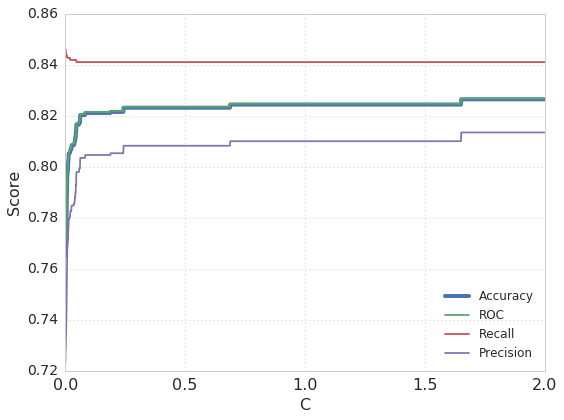

In [17]:
## Worse fit oh no!
# Plot scores
plt.plot(Cs, accuracy, label='Accuracy', linewidth=4)
plt.plot(Cs, roc, label='ROC')
plt.plot(Cs, recall, label='Recall')
plt.plot(Cs, precision, label='Precision')

plt.ylabel("Score")
plt.xlabel("C")
plt.legend(loc=4)
plt.tight_layout()

plt.savefig("tristanCrossVal_subset")